In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"edcc1f9e-1428-476f-85e5-cd9c2860258e\"")

**SQL Question**
1. How many different listings were there on 2021-01-10? By how many different hosts? 
2. What are the top 10 most expensive (price-wise) listings?
3. Which listing has the lowest Calendar vacancy rate?
4. What 5 listings have had the most frequent day-over-day price increases?

In [ ]:
# import jinja2
# raw_query = """
#     select *
#     from calendar.csv
#     limit 10
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select *
#     from listings.csv
#     limit 10
# """
# sql_query = jinja2.Template(raw_query).render(vars())

***Data Quality Check***
1. ensured no duplicates in two main tables 
2. ensured that all the listings in `calendars` table (fact table) have an entry in `listings` table (dim table)
3. Timeframe of `calendars` dataset : `2020-12-29` ~ `2022-01-04`

In [ ]:
# import jinja2
# raw_query = """
#     -- data quality check 
#     -- check if any listings on calendar table are missing in listings table --> expect null
#     select distinct c.listing_id 
#     from calendar.csv c
#     where not exists (select 1 from listings.csv l where c.listing_id = l.id )
#     ;
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     -- check duplicates 
#     -- Primary key of calendar table: listing_id & date--> expect null
#     select listing_id, date, count(1)
#     from calendar.csv
#     group by 1,2
#     having count(1) > 1
#     ;
#     -- PK of listings table: id (listing_id0) --> expect null 
#     select id, count(1)
#     from listings.csv
#     group by 1
#     having count(1) > 1
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     -- check the timeframe of dataset 
#     select min(date) as min_date,
#            max(date) as max_date
#     from calendar.csv
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select count(distinct listing_id)
#     from calendar.csv
#     where date = '2020-12-29'
#     
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     -- check daily count 
#     -- it was observed that there seem to be missing data around beginning of 2021 and 2022
#     select date as partition_date, 
#            count(distinct listing_id) as daily_listing_cnt
#     from calendar.csv
#     group by 1
#     order by date
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select host_since, count(distinct host_id) as host_counts
#     from listings.csv 
#     group by 1
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
import altair
chart_dataframe_10 = altair.Chart.from_json("""
{
    "width": 500,
    "height": 500,
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [
        {
            "data": {
                "name": "layer00"
            },
            "mark": {
                "tooltip": true,
                "type": "bar",
                "clip": true
            },
            "encoding": {
                "x": {
                    "field": "host_since",
                    "type": "temporal",
                    "timeUnit": "year"
                },
                "y": {
                    "field": "host_counts",
                    "type": "quantitative"
                }
            }
        }
    ],
    "resolve": {
        "scale": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    }
}
""")
chart_dataframe_10.datasets.layer00 = dataframe_10.to_json(orient='records')
chart_dataframe_10.display(actions=False)

In [ ]:
import altair
chart_dataframe_8 = altair.Chart.from_json("""
{
    "width": 500,
    "height": 500,
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [
        {
            "data": {
                "name": "layer00"
            },
            "mark": {
                "type": "line",
                "clip": true,
                "tooltip": true
            },
            "encoding": {
                "x": {
                    "field": "partition_date",
                    "type": "temporal",
                    "aggregate": "average",
                    "timeUnit": "yearweekday"
                },
                "y": {
                    "field": "daily_listing_cnt",
                    "type": "quantitative"
                }
            }
        }
    ],
    "resolve": {
        "scale": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    }
}
""")
chart_dataframe_8.datasets.layer00 = dataframe_8.to_json(orient='records')
chart_dataframe_8.display(actions=False)

Q1: How many different listings were there on `2021-01-10` ? By how many different hosts? 



In [ ]:
# import jinja2
# raw_query = """
#     select count(distinct c.listing_id) as unique_listing_cnt,
#            count(distinct l.host_id) as unique_host_cnt
#     from calendar.csv c
#     inner join listings.csv l on c.listing_id = l.id
#     where c.date = '2021-01-10'
#     
# """
# sql_query = jinja2.Template(raw_query).render(vars())

Q2. What are the top 10 most expensive (price-wise) listings? 



In [ ]:
# import jinja2
# raw_query = """
#     -- What are the top 10 most expensive (price-wise) listings? have it broken down by avg and P50
#     with price as (
#         select listing_id,
#             min(price) as min_price,
#             max(price) as max_price,
#             avg(price) as avg_price,
#             median(price) as p50_price
#         from calendar.csv
#     group by 1
#     ),
#     rnk as (
#         select *, 
#            rank() over (order by avg_price desc) as avg_price_rnk,
#            rank() over (order by p50_price desc) as p50_price_rnk
#         from price
#     )
#     select *
#     from rnk
#     where avg_price_rnk <= 10
#     order by avg_price_rnk
#     ;
#     
# """
# sql_query = jinja2.Template(raw_query).render(vars())

Q3. Which listing has the lowest Calendar vacancy rate?



In [ ]:
# import jinja2
# raw_query = """
#     -- vacancy rate is defined as percentage of unoccupied units relative to the total number of rental units available at a property over a specified period
#     with vacancy as (
#         select listing_id, 
#                 count(Date) as total_days,
#                 sum(case when available = True then 1 end) as vacancy_cnt,
#         from calendar.csv c
#         where date between '2021-01-01' and '2021-12-31' -- full year of data
#         group by 1
#     )
#     select listing_id, 
#            vacancy_cnt,
#            availability_365,
#            round(ifnull(vacancy_cnt::float,0)/ availability_365,2) as vacancy_rate
#     from vacancy v
#     join listings.csv l on v.listing_id = l.id
#     where has_availability = true
#     and availability_365 <> 0
#     and vacancy_cnt is not null
#     order by 4 asc
#     limit 5 
#     
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select *
#     from calendar.csv c
#     where listing_id = 10359909
#     and available = true
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select *
#     from listings.csv
#     where has_availability= true and availability_365 > 0
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select v.*, l.has_availability, l.availability_365
#     from calendar.csv v
#     left join listings.csv l on v.listing_id = l.id
#     where has_availability = true
#     and v.listing_id = 12651
#     ;
#     select *
#     from calendar.csv c
#     where listing_id = 29059567
# """
# sql_query = jinja2.Template(raw_query).render(vars())

Q4. What 5 listings have had the most frequent day-over-day price increases?



In [ ]:
# import jinja2
# raw_query = """
#     -- step 1: count the distinct price change per day per listing 
#     -- step 2: create a flag indicating if the change is increase relative to previous day using window function
#     -- step 3: agg based on # of flag per listing 
#     with base as (
#         select distinct listing_id, date, price  
#         from calendar.csv 
#     ),
#     price_change as (
#         select listing_id, 
#                 date, 
#                 price,
#                 lag(price) over (partition by listing_id order by date) as last_price,
#                 lag(date) over (partition by listing_id order by date) as last_date
#         from base 
#     )
#     select listing_id, 
#            sum(case when price > last_price then 1 else 0 end) as price_increase_freq
#     from price_change
#     group by 1
#     order by 2 desc 
#     limit 5
#     
# """
# sql_query = jinja2.Template(raw_query).render(vars())

**Python Questions**
1. Please review the integrity of the data. Do you notice any data anomalies? If so, please describe them. 
2. Calculate the average listing price by calendar day. Based on the results, do you notice any performance trends of listing price over time? If so, please describe them and give short explanations on why you think this could happen?
3. Suppose Airbnb charges 10% commission fee on each booked listing. Please use the data to give business operation recommendations on how to increase the commission revenue.


In [ ]:
# import librarIsADirectoryError
import pandas as pd
import numpy as np
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re
from wordcloud import WordCloud
from tqdm import tqdm
from datetime import datetime, date

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import coo_matrix
from scipy.sparse import hstack
from scipy.sparse import vstack
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.preprocessing import OneHotEncoder
import pickle
import joblib

In [ ]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')

In [ ]:
calendar.info()
calendar.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982950 entries, 0 to 982949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  982950 non-null  int64 
 1   date        982950 non-null  object
 2   available   982950 non-null  object
 3   price       982950 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 30.0+ MB


(982950, 4)

In [ ]:
# std of price is high --> dig into any outliers 
calendar.describe()

,listing_id,price
count,9.829500e+05,982950.000000
mean,2.709136e+07,202.158518
std,1.378660e+07,325.455831
min,1.265100e+04,0.000000
25%,1.629927e+07,79.000000
50%,2.874998e+07,129.000000
75%,3.946912e+07,229.000000
max,4.729992e+07,10000.000000


In [ ]:
listings.info()
listings.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2693 non-null   int64  
 1   host_id                 2693 non-null   int64  
 2   host_name               2693 non-null   object 
 3   host_since              2693 non-null   object 
 4   host_response_time      2132 non-null   object 
 5   host_response_rate      2132 non-null   object 
 6   host_acceptance_rate    2387 non-null   object 
 7   host_is_superhost       2693 non-null   object 
 8   host_verifications      2693 non-null   object 
 9   host_identity_verified  2693 non-null   object 
 10  neighbourhood           2693 non-null   object 
 11  room_type               2693 non-null   object 
 12  accommodates            2693 non-null   int64  
 13  bedrooms                2529 non-null   float64
 14  beds                    2659 non-null   

(2693, 24)

In [ ]:
# based on data profiling, focus on numeric variables with a high standard deviation
# beds, minimum_nights, maximum_nights, number_of_reviews
listings.describe()

,id,host_id,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
count,2.693000e+03,2.693000e+03,2693.000000,2529.000000,2659.000000,2693.000000,2693.000000,2693.000000,2693.000000,2279.000000,2293.000000
mean,2.709138e+07,9.181177e+07,3.869662,1.708976,2.219631,8.086521,631.439658,181.115113,52.891199,95.740237,1.874348
std,1.378917e+07,9.921901e+07,3.156237,1.156607,2.031332,18.128635,545.467062,135.635961,79.317518,5.848700,1.968969
min,1.265100e+04,2.490000e+02,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20.000000,0.010000
25%,1.629927e+07,1.363514e+07,2.000000,1.000000,1.000000,1.000000,31.000000,70.000000,2.000000,94.000000,0.390000
50%,2.874998e+07,4.800549e+07,2.000000,1.000000,1.000000,2.000000,1124.000000,172.000000,20.000000,97.000000,1.180000
75%,3.946912e+07,1.472867e+08,5.000000,2.000000,3.000000,5.000000,1125.000000,341.000000,68.000000,100.000000,2.710000
max,4.729992e+07,3.825590e+08,16.000000,8.000000,27.000000,365.000000,10000.000000,365.000000,711.000000,100.000000,20.040000


In [ ]:
# Please review the integrity of the data. Do you notice any data anomalies? If so, please describe them.
# check null values
print(listings.isnull().any())
print(calendar.isnull().any())

id                        False
host_id                   False
host_name                 False
host_since                False
host_response_time         True
host_response_rate         True
host_acceptance_rate       True
host_is_superhost         False
host_verifications        False
host_identity_verified    False
neighbourhood             False
room_type                 False
accommodates              False
bedrooms                   True
beds                       True
amenities                 False
minimum_nights            False
maximum_nights            False
has_availability          False
availability_365          False
number_of_reviews         False
review_scores_rating       True
instant_bookable          False
reviews_per_month          True
dtype: bool
listing_id    False
date          False
available     False
price         False
dtype: bool


In [ ]:
# 7 columns have null value host_response_time, host_response_rate, host_acceptance_rate, bedrooms, beds, review_scores_rating, reviews_per_month
# check the null value pct for each column 

def null_percentage(df, col):
    print('Percentage (%) of Null Records in {}:'.format(col), round(((df[col].isnull().sum()*100)/df.shape[0]),3))

In [ ]:
# host_response_time & host_response_rate have the highest % of null records 
null_col = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds', 'review_scores_rating', 'reviews_per_month']
for i in null_col: 
    null_percentage(listings, i)

Percentage (%) of Null Records in host_response_time: 20.832
Percentage (%) of Null Records in host_response_rate: 20.832
Percentage (%) of Null Records in host_acceptance_rate: 11.363
Percentage (%) of Null Records in bedrooms: 6.09
Percentage (%) of Null Records in beds: 1.263
Percentage (%) of Null Records in review_scores_rating: 15.373
Percentage (%) of Null Records in reviews_per_month: 14.853


In [ ]:
# Univariate analysis 
print('Total unique values in  field :')
gender = train_df['gender'].value_counts()
print(gender)

**Detect Outliers**
An outlier is a data-item that deviate significantly from the rest of observations. There are multiple ways to detect outliers. 
We were using visualizations (box plot & scatter plot) and IQR (Inter Quartile Range) to detect anomalies.


<AxesSubplot:xlabel='avg_price'>

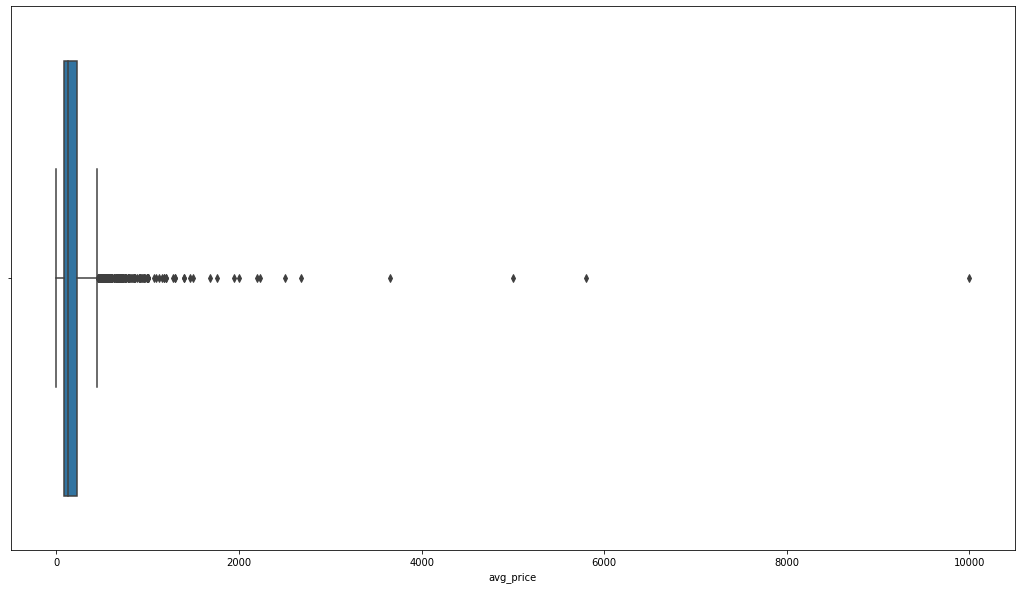

In [ ]:
# Box Plot: Boxplot summarizes sample data using 25th, 50th, and 75th percentiles
# it looks like there are few listings whose price is > 90th percentile price
calendar_agg = calendar.groupby(by='listing_id', as_index=False).agg(avg_price = ('price','mean'),
                                                                     max_price = ('price','max'))
fig, ax = plt.subplots(figsize = (18,10))
sns.boxplot(calendar_agg['avg_price'])

The box plot suggests that a few listings have relatively high listing price. Below are listing id that has a price > `$4000`. 

In [ ]:
calendar_agg.loc[calendar_agg.avg_price > 4000, ['listing_id','avg_price', 'max_price']]

,listing_id,avg_price,max_price
449,10808594,5800.0,5800
1171,24844520,5000.0,5000
1788,35995111,10000.0,10000


**Data Profiling**
1. No missing data in `calendar` table whereas seven columns in `listings` table have missing values. `host_response_time` and `host_response_rate` have the highest percentages of null records (20.8%) followed by `host_acceptance_rate` (11.4%).
2. 80.7% of hosts have verified identitied but there's still ~20% of hosts haven't verified yet. 
3. 1.2% of listings didn't have availability (31 out of 2693)
4. 

In [ ]:
# IQR: IQR = Quartile3 (P75) – Quartile1(P25)
Q1 = np.percentile(calendar_agg['avg_price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(calendar_agg['avg_price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
# Above Upper bound
upper = calendar_agg['avg_price'] >= (Q3+1.5*IQR)
# Below Lower bound
lower = calendar_agg['avg_price'] <= (Q1-1.5*IQR)
# 208 listings are outside the range 
calendar_agg.loc[upper | lower, 'listing_id']

7          63146
11        123653
37        634347
43        789518
149      2653210
          ...   
2642    46964204
2643    46985775
2645    46988931
2651    47077864
2653    47103245
Name: listing_id, Length: 208, dtype: int64

In [ ]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 kB 31.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 108.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 54.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=db88e3ebb460b24fadad89d2f5735dfd2c6e21c9f6899d0870d3cb322731219f
  Stored in directory: /home/hexuser/.cache/pip/wheels/ab/a0/78/885e94cd7af32ff120febdad1870c5381c884d7f4b332d58dd
Successfully built htmlmin


In [ ]:

from pandas_profiling import ProfileReport
#We only use the first 10000 data points
prof = ProfileReport(listings) 
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# 2. Calculate the average listing price by calendar day. Based on the results, do you notice any performance trends of listing price over time? 
# If so, please describe them and give short explanations on why you think this could happen?


In [ ]:
# clean data based on findings in #1
df_calendar_listings = pd.merge(calendar, listings.rename(columns={'id':'listing_id'}),
                                    how='left',
                                    on=['listing_id'])

In [ ]:
df_calendar_listings.head()

,listing_id,date,available,price,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,beds,amenities,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
0,12651,2021-01-04,f,197,49735,Laurel,10/29/09,within an hour,100%,98%,...,1.0,"[""Private entrance"", ""Long term stays allowed""...",3,365,t,356,151,98.0,t,1.13
1,12651,2021-01-05,f,197,49735,Laurel,10/29/09,within an hour,100%,98%,...,1.0,"[""Private entrance"", ""Long term stays allowed""...",3,365,t,356,151,98.0,t,1.13
2,12651,2021-01-06,f,197,49735,Laurel,10/29/09,within an hour,100%,98%,...,1.0,"[""Private entrance"", ""Long term stays allowed""...",3,365,t,356,151,98.0,t,1.13
3,12651,2021-01-07,f,197,49735,Laurel,10/29/09,within an hour,100%,98%,...,1.0,"[""Private entrance"", ""Long term stays allowed""...",3,365,t,356,151,98.0,t,1.13
4,12651,2021-01-08,f,197,49735,Laurel,10/29/09,within an hour,100%,98%,...,1.0,"[""Private entrance"", ""Long term stays allowed""...",3,365,t,356,151,98.0,t,1.13


In [ ]:
df_calendar_listings_agg = df_calendar_listings.loc[
                        (df_calendar_listings.has_availability == 't') & 
                        (df_calendar_listings.availability_365 != 0) & 
                        (df_calendar_listings.price <= 4000) & df_calendar_listings.available == True]

In [ ]:
df_calendar_listings_agg.head()

,listing_id,date,available,price,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,beds,amenities,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
0,12651,2021-01-04,f,197,49735,Laurel,10/29/09,within an hour,100%,98%,...,1.0,"[""Private entrance"", ""Long term stays allowed""...",3,365,t,356,151,98.0,t,1.13
1,12651,2021-01-05,f,197,49735,Laurel,10/29/09,within an hour,100%,98%,...,1.0,"[""Private entrance"", ""Long term stays allowed""...",3,365,t,356,151,98.0,t,1.13
2,12651,2021-01-06,f,197,49735,Laurel,10/29/09,within an hour,100%,98%,...,1.0,"[""Private entrance"", ""Long term stays allowed""...",3,365,t,356,151,98.0,t,1.13
3,12651,2021-01-07,f,197,49735,Laurel,10/29/09,within an hour,100%,98%,...,1.0,"[""Private entrance"", ""Long term stays allowed""...",3,365,t,356,151,98.0,t,1.13
4,12651,2021-01-08,f,197,49735,Laurel,10/29/09,within an hour,100%,98%,...,1.0,"[""Private entrance"", ""Long term stays allowed""...",3,365,t,356,151,98.0,t,1.13


In [ ]:
df_calendar_listings_grouped = df_calendar_listings_agg.groupby(by='date', as_index= False).agg(avg_price = ('price', 'mean'), p50_price = ('price', 'median'))

In [ ]:
df_calendar_listings_grouped.head()

,date,avg_price,p50_price
0,2020-12-29,178.666667,196.0
1,2020-12-30,147.479381,99.5
2,2020-12-31,185.113475,114.5
3,2021-01-01,198.612971,120.0
4,2021-01-02,194.982044,119.0


In [ ]:
import altair
chart_df_calendar_listings_grouped = altair.Chart.from_json("""
{
    "width": 500,
    "height": 500,
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [
        {
            "data": {
                "name": "layer00"
            },
            "mark": {
                "type": "line",
                "clip": true,
                "tooltip": true
            },
            "encoding": {
                "x": {
                    "field": "date",
                    "type": "ordinal",
                    "timeUnit": "yearweekday"
                },
                "y": {
                    "field": "avg_price",
                    "type": "quantitative"
                }
            }
        }
    ],
    "resolve": {
        "scale": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    }
}
""")
chart_df_calendar_listings_grouped.datasets.layer00 = df_calendar_listings_grouped.to_json(orient='records')
chart_df_calendar_listings_grouped.display(actions=False)

In [ ]:
# import jinja2
# raw_query = """
#     select date,
#            room_type,
#            count(distinct c.listing_id) as unique_listing_cnt,
#            count(distinct case when available = false then listing_id end) as occupied_cnt
#     from calendar.csv c
#     inner join listings.csv l on c.listing_id = l.id
#     and l.has_availability = True 
#     and l.availability_365 <> 0 
#     group by 1,2
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
import altair
chart_dataframe_16 = altair.Chart.from_json("""
{
    "width": 500,
    "height": 500,
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [
        {
            "data": {
                "name": "layer00"
            },
            "mark": {
                "type": "line",
                "clip": true,
                "tooltip": true
            },
            "encoding": {
                "x": {
                    "field": "date",
                    "type": "temporal",
                    "timeUnit": "yearweek"
                },
                "y": {
                    "field": "occupied_cnt",
                    "type": "quantitative"
                },
                "color": {
                    "field": "room_type",
                    "type": "nominal"
                }
            }
        }
    ],
    "resolve": {
        "scale": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    }
}
""")
chart_dataframe_16.datasets.layer00 = dataframe_16.to_json(orient='records')
chart_dataframe_16.display(actions=False)

Suppose Airbnb charges 10% commission fee on each booked listing. Please use the data to give business operation recommendations on how to increase the commission revenue.


1. revenue = listing price * book rate (# of available = false / # total number of listings)  * 10%. understand what driving the demands 
2.  
						


					
				
			
		
	


